# Visualize Trainig

path ferrygym ['/workspace/PPUU/results/policy/4-11-MPUR-new-cost', '/opt/conda/lib/python38.zip', '/opt/conda/lib/python3.8', '/opt/conda/lib/python3.8/lib-dynload', '', '/root/.cache/pypoetry/virtualenvs/ppuu-ferrygym-xS3fZVNL-py3.8/lib/python3.8/site-packages', '/workspace/PPUU/', '/workspace', '/root/.cache/pypoetry/virtualenvs/ppuu-ferrygym-xS3fZVNL-py3.8/lib/python3.8/site-packages/ferrygym']


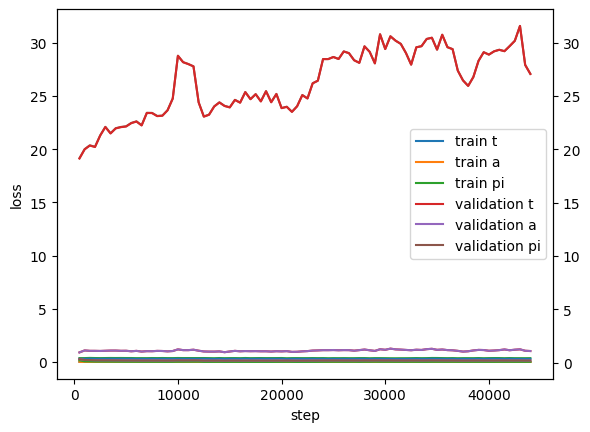

In [1]:
%matplotlib inline
import sys
sys.path.append('/workspace/PPUU/')

import results.utils

data = results.utils.load_MPUR_log_file('/workspace/PPUU/results/policy/4-11-MPUR-new-cost/MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=8-npred=20-ureg=0.05-lambdal=0.2-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=False-learnedcost=False-seed=1-novalue.log')

results.utils.plot_MPUR_losses(data)

In [3]:
ncond = 10
npred = 10
bsize = 4

DATASET_NAME = 'rev-moenk-22-04-01-12-00--04-02'
# get batch from dataset
from dataloader import DataLoader
class DataSettings:
        debug = False
        batch_size = bsize
        npred = npred
        ncond = ncond
        width = 100
        height = 100
        loadImagesInMemory = False

    # Instantiate data set object
d = DataLoader(opt=DataSettings, data_dir='/workspace/data/' + DATASET_NAME + '/', dataframe=DATASET_NAME + '.pkl', image_dir='/workspace/data/' + DATASET_NAME + '/images/')


/workspace/PPUU/dataloader.py:51: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  self.df = self.df.groupby('mmsi').apply(lambda x: x.assign(group_index = range(len(x))))


Number of episodes: 336531
[loading data splits: /workspace/data/rev-moenk-22-04-01-12-00--04-02//splits.pth]


In [4]:
# load model
import sys
sys.path.insert(0, '/workspace/')

import torch
modelPath = '/workspace/PPUU/results/policy/4-11-MPUR-new-cost/MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=8-npred=20-ureg=0.05-lambdal=0.2-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=False-learnedcost=False-seed=1-novalue.model'
model = torch.load(modelPath)['model']
model.eval()
model.cuda()

/workspace/PPUU/ppuu_utils.py:188: DeprecationWarning: invalid escape sequence \d
  car_id = int(re.findall('car(\d+).pkl', splits[-1])[0])


FwdCNN_VAE(
  (encoder): encoder(
    (f_encoder): Sequential(
      (0): Conv2d(30, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): Dropout2d(p=0.1, inplace=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
      (3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (4): Dropout2d(p=0.1, inplace=True)
      (5): LeakyReLU(negative_slope=0.2, inplace=True)
      (6): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    )
    (s_encoder): Sequential(
      (0): Linear(in_features=40, out_features=256, bias=True)
      (1): Dropout(p=0.1, inplace=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
      (3): Linear(in_features=256, out_features=256, bias=True)
      (4): Dropout(p=0.1, inplace=True)
      (5): LeakyReLU(negative_slope=0.2, inplace=True)
      (6): Linear(in_features=256, out_features=36864, bias=True)
    )
  )
  (decoder): decoder(
    (f_decoder): Sequential(
      (0): ConvTranspose2d(256

In [24]:
import importlib
sys.path.insert(0, '/workspace/PPUU/')
import results.utils
from ferrygym import plot_helpers
import datetime
importlib.reload(plot_helpers)
importlib.reload(results.utils)

resetOptions = {
        'startPosition': [54.332833, 10.156], # near reventlue
        # 'startPosition': [54.347794, 10.168850], # near moenkeberg 
        # 'startPosition': [54.340239, 10.165159], # middle of waterway 
        # 'startPosition': [54.331857, 10.168850], # schwentine 
        'startDirection': 240,
        'startSpeed': 0.0,
        'startingTime': datetime.datetime(2022, 4, 10, 13, 0, 0),
        'random_startingTime': False,
        }


policy = results.utils.load_nn_policy(modelPath, d.get_stats())

env = results.utils.load_environment()
results = results.utils.run_policy(env, policy,stack_obs=10, max_steps=500, nr_episodes=5, returnObservations=True, resetOptions=resetOptions )

reset called
agent is outside sea
Episode: 0, Total reward: -100
reset called
agent is outside sea
Episode: 1, Total reward: -100
reset called
agent is outside sea
Episode: 2, Total reward: -100
reset called
agent is outside sea
Episode: 3, Total reward: -100
reset called
agent is outside sea
Episode: 4, Total reward: -100


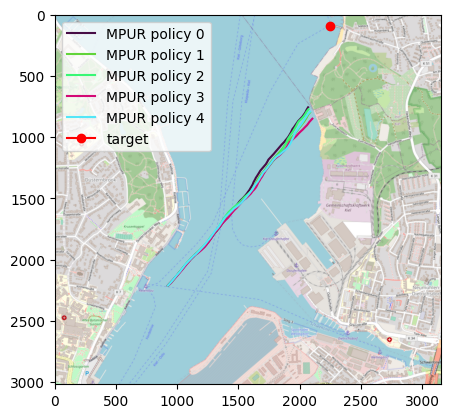

In [25]:
# plot trajectory:
%matplotlib inline


plot_helpers.plot_trajectories([
    (results[0][2],'MPUR policy 0'),
    (results[1][2],'MPUR policy 1'),
    (results[2][2],'MPUR policy 2'),
    (results[3][2],'MPUR policy 3'),
    (results[4][2],'MPUR policy 4'),
])

In [12]:
import numpy as np
result_no = 0
positions = results[result_no][2]
speeds = results[result_no][4]
directions = results[result_no][5]
actions = results[result_no][6]
# concat positions and speeds
states = np.column_stack((positions, speeds, directions, actions))
# round to 2 decimals
states = np.round(states, 2)
# print first 10 states without sience notation
np.set_printoptions(suppress=True)
print(states[:30])

[[1755.08 2321.31    0.    240.      0.      0.  ]
 [1754.69 2321.45    0.41  250.      0.41   10.77]
 [1753.87 2321.59    0.83  260.      0.41   10.77]
 [1752.63 2321.63    1.24  268.29    0.41    8.29]
 [1751.   2321.39    1.66  278.29    0.41   10.77]
 [1748.97 2320.95    2.07  282.31    0.41    4.03]
 [1746.59 2320.26    2.48  286.11    0.41    3.8 ]
 [1743.89 2319.22    2.9   291.08    0.41    4.98]
 [1740.86 2317.87    3.31  294.1     0.41    3.01]
 [1737.62 2316.04    3.72  299.4     0.41    5.3 ]
 [1734.24 2313.66    4.14  305.14    0.41    5.74]
 [1730.76 2310.72    4.55  310.13    0.41    4.99]
 [1727.18 2307.27    4.97  313.96    0.41    3.83]
 [1723.63 2303.24    5.38  318.63    0.41    4.67]
 [1719.87 2298.83    5.79  319.53    0.41    0.9 ]
 [1715.79 2294.15    6.21  318.91    0.41   -0.62]
 [1711.31 2289.3     6.59  317.31    0.39   -1.6 ]
 [1706.5  2284.27    6.97  316.3     0.37   -1.02]
 [1701.02 2279.32    7.38  312.09    0.41   -4.2 ]
 [1695.17 2274.17    7.8   311.

In [14]:
# calculate costs at timestep
import ppuu_utils
import torch
target_position = torch.tensor([2244.34601982, 90.73506014])

sample = 2
timestep = 0
images = torch.tensor([x['neighborhood'] for x in results[sample][7]]).to(device='cpu', non_blocking=True).unsqueeze(0).permute(0, 1, 4, 2, 3)
states = torch.tensor([[obs['agent_position'][0],
         obs['agent_position'][1],
         obs['agent_speed'],
         obs['agent_direction'],
        ] for obs in results[sample][7]]).to(device='cpu', non_blocking=True).unsqueeze(0)
print(states.shape)
print(images.shape)
# normalize states and images
images, states = ppuu_utils.normalize_inputs(images, states, d.get_stats())
land_costs = ppuu_utils.land_cost(images.cuda())[0].cpu().numpy()
proximity_costs = ppuu_utils.proximity_cost(images.cuda())[0].cpu().numpy()
target_costs = ppuu_utils.target_cost(states[:,0].cuda(), states.cuda(), target_position, 2, 0.2, d.get_stats()).cpu().numpy()

torch.Size([1, 109, 4])
torch.Size([1, 109, 3, 100, 100])


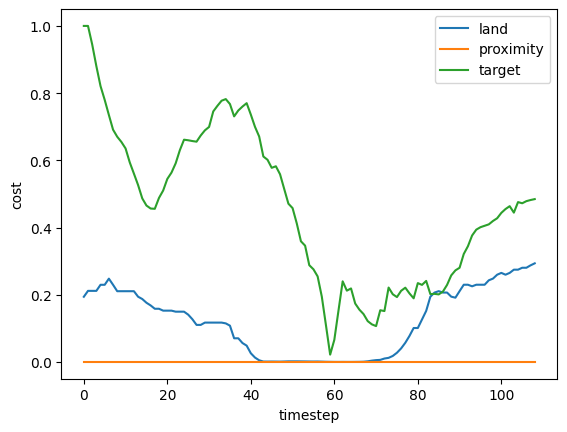

In [15]:
# plot land and proximity costs
%matplotlib inline
import matplotlib.pyplot as plt

# line plot
x = range(len(land_costs[0]))
plt.plot(x, land_costs[0], label='land')
plt.plot(x, proximity_costs[0], label='proximity')
plt.plot(x, target_costs[0], label='target')
# y label
plt.ylabel('cost')
# x label
plt.xlabel('timestep')
plt.legend()
# save plot
plt.savefig('costs.png')

(110, 2)


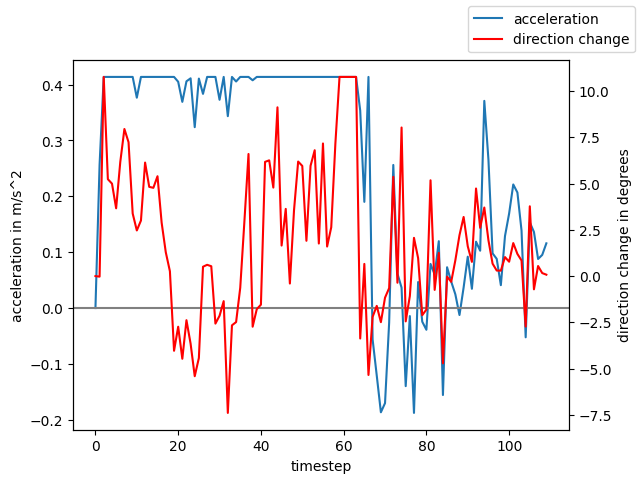

In [16]:
# plot actions
actions = np.array(results[sample][6])
print(actions.shape)

# line plot with two y axes
x = range(len(actions))

fig, ax1 = plt.subplots()
ax1.plot(x, actions[:,0], label='acceleration')
ax1.set_ylabel('acceleration in m/s^2')
ax1.set_xlabel('timestep')
ax2=ax1.twinx()
ax2.plot(x, actions[:,1], label='direction change', color='red')
ax2.set_ylabel('direction change in degrees')
ax2.set_xlabel('timestep')
# add line at 0
ax1.axhline(y=0, color='grey', linestyle='-')
fig.legend()
# save figure in current directory
fig.savefig('actions.png')

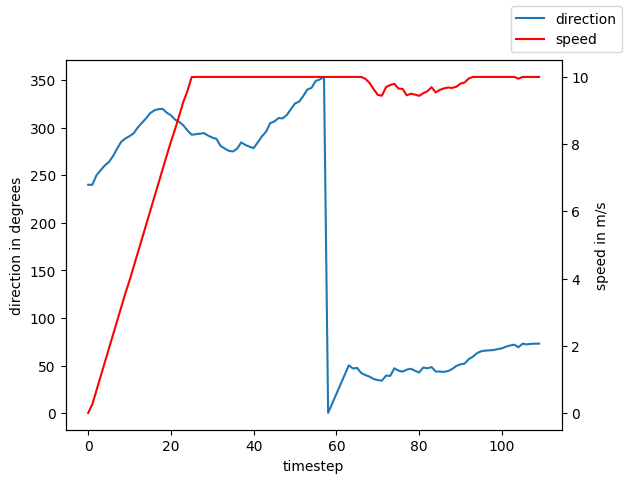

In [17]:
# plot direction and speed
directions = np.array(results[sample][5])
speeds = np.array(results[sample][4])

x = range(len(directions))

# line plot with two y axes
fig, ax1 = plt.subplots()
ax1.plot(x, directions, label='direction')
ax1.set_ylabel('direction in degrees')
ax1.set_xlabel('timestep')
ax2 = ax1.twinx()
ax2.plot(x, speeds, label='speed', color='red')
ax2.set_ylabel('speed in m/s')
fig.legend()
# save figure in current folder
fig.savefig('direction_speed.png')

In [19]:
# compare image from dataloader with image from environment
inputs, actions, targets = d.get_batch_fm('train', 10)

(3, 100, 100)


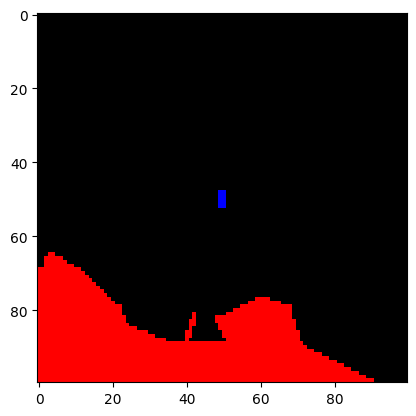

In [20]:
image_d = inputs[0][0][9].cpu().numpy()
print(image_d.shape)
image_d = image_d.transpose(1,2,0)

# plot image
import matplotlib.pyplot as plt
plt.imshow(image_d)

(100, 100, 3)


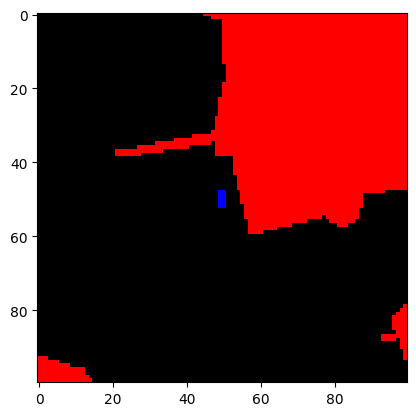

In [21]:
image_o = results[0][7][-10]['neighborhood']
print(image_o.shape)
# plot image
import matplotlib.pyplot as plt
plt.imshow(image_o)